In [1]:
# install pandas with the execl dependency
# !pip install "pandas[excel]" 

# install matplotlib for plotting
# !python -m pip install -U matplotlib

# install plotly for choropleth plots
# pip install plotly==5.24.1

# optional install folium for heatmaps
# !pip install folium


# IEGMA Analyst Test

Context: Imagine that you are an analyst working on an IEG evaluation for which you need to
identify a preliminary portfolio of projects and provide some basic information to the team leader
on the composition and size of this portfolio. To accomplish your task you will need to use two
datasets. You have 48 hours to accomplish the task but we don’t expect the work to take more
than 5 hours.

**Instructions**: Based on the two datasets provided, please do the following. 
- For items 1. through 5., you will only need to use the Workbook “all.xlsx”.
- For item 6., you will use both “all.xlsx" and “IEG_ICRR-PPAR_Lessons_2024-06-20.xlsx”.

---

Let's start by loading the data from the `all.xlsx` file and previewing the first 5 rows of each sheet.


In [168]:
import pandas as pd # to load and read the execl file 
import matplotlib.pyplot as plt
import plotly.express as px

# the path to the all.xlsx file
workbook_path = "data/all.xlsx"

In [14]:
# with sheet_name=None we read all the sheets and store as dataframes in a dict
# second row (1) is used as the header and no index column
workbook_sheets_dict = pd.read_excel(workbook_path, sheet_name=None, header=1, index_col=None)  

Let's preview the result

In [15]:
# list all the sheets in the workbook
print("Sheets in the workbook: ", list(workbook_sheets_dict.keys()))

Sheets in the workbook:  ['World Bank Projects', 'Themes', 'Sectors', 'GEO Locations', 'Financers']


Let's preview the first 5 rows of each sheet and the column names

**World Bank Projects** sheet

In [55]:
# preview the first 5 rows of the World Bank Projects sheet
world_bank_projects_df = workbook_sheets_dict["World Bank Projects"]

# print the column names
print("World Bank Projects columns: ", world_bank_projects_df.columns)

# preview the first 5 rows
world_bank_projects_df.head()

World Bank Projects columns:  Index(['Project ID', 'Region', 'Country', 'Project Status',
       'Last Stage Reached Name', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Board Approval Date', 'Project Closing Date', 'Current Project Cost',
       'IBRD Commitment', 'IDA Commitment', 'Grant Amount',
       'Total IBRD, IDA and Grant Commitment', 'Borrower',
       'Lending Instrument', 'Environmental Assessment Category',
       'Environmental and Social Risk', 'Associated Project',
       'Consultant Services Required', 'Financing Type'],
      dtype='object')


,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Board Approval Date,Project Closing Date,...,IDA Commitment,Grant Amount,"Total IBRD, IDA and Grant Commitment",Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Associated Project,Consultant Services Required,Financing Type
0,id,regionname,countryshortname,status,last_stage_reached_name,project_name,pdo,impagency,boardapprovaldate,closingdate,...,idacommamt,grantamt,curr_total_commitment,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,supplementprojectflg,cons_serv_reqd_ind,projectfinancialtype
1,P000001,Africa,Africa,Closed,BANK APPROVED,West Africa Pilot Community-based Natural Reso...,CONSERVATION OF BIO-DIVERSITY. OBJECTIVE IS T...,NaN,1995-09-14T00:00:00Z,2004-06-30,...,NaN,11400000,11400000,NaN,Specific Investment Loan,B,NaN,N,NaN,Other
2,P000002,Africa,Africa,Dropped,BANK APPROVED,LAKE VICTORIA ENVIRO,NaN,NaN,1997-06-30T00:00:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN
3,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18T00:00:00Z,2003-06-30,...,NaN,16700000,16700000,NaN,Specific Investment Loan,C,NaN,N,NaN,Other
4,P000004,Africa,Africa,Dropped,BANK APPROVED,P.TA/SADCC TRADE DEV,NaN,NaN,1991-06-30T00:00:00Z,NaN,...,NaN,NaN,NaN,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN


Seems there is an extra metadata row at the start of the sheet, let's skip that. Let's also convert the "Board Approval Date" column to datetime format for easier filtering later on.


In [76]:
# Drop the first row as it contains redundant header information
world_bank_projects_df = world_bank_projects_df.drop(0).reset_index(drop=True)

# Convert 'Board Approval Date' to datetime format, normalize and remove timezone (its all UTC)
world_bank_projects_df['Board Approval Date'] = pd.to_datetime(world_bank_projects_df['Board Approval Date']).dt.tz_localize(None).dt.normalize()

# preview the first 5 rows of the World Bank Projects again
world_bank_projects_df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Board Approval Date,Project Closing Date,...,IDA Commitment,Grant Amount,"Total IBRD, IDA and Grant Commitment",Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Associated Project,Consultant Services Required,Financing Type
0,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18,2003-06-30,...,NaN,16700000,16700000,NaN,Specific Investment Loan,C,NaN,N,NaN,Other
1,P000004,Africa,Africa,Dropped,BANK APPROVED,P.TA/SADCC TRADE DEV,NaN,NaN,1991-06-30,NaN,...,NaN,NaN,NaN,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN
2,P000005,Africa,Africa,Dropped,BANK APPROVED,P.TA/SADDC TRADE DEV II,NaN,NaN,1990-06-30,NaN,...,NaN,NaN,NaN,NaN,Specific Investment Loan,D,NaN,NaN,NaN,NaN
3,P000006,Africa,Western and Central Africa,Dropped,BANK APPROVED,REGIONAL POWER,NaN,NaN,1997-06-30,NaN,...,NaN,NaN,NaN,NaN,Specific Investment Loan,A,NaN,NaN,NaN,NaN
4,P000007,Africa,Africa,Dropped,BANK APPROVED,ADJARALA HYDRO,NaN,NaN,1996-06-30,NaN,...,NaN,NaN,NaN,NaN,Specific Investment Loan,A,NaN,NaN,NaN,NaN


Much better, let's continue with the other sheets

**Themes** sheet

In [77]:
# preview the first 5 rows of the Themes sheet
themes_df = workbook_sheets_dict["Themes"]

# print the column names
print("Themes columns: ", themes_df.columns)

# preview the first 5 rows
themes_df.head()

Themes columns:  Index(['Project ID', 'Level 1', 'Percentage 1', 'Level 2', 'Percentage 2',
       'Level 3', 'Percentage 3'],
      dtype='object')


,Project ID,Level 1,Percentage 1,Level 2,Percentage 2,Level 3,Percentage 3
0,P000001,Environment and Natural Resource Management,50,NaN,NaN,NaN,NaN
1,P000001,> Environment and Natural Resource Management,50,Environmental policies and institutions,25.0,NaN,NaN
2,P000001,> Environment and Natural Resource Management,50,Renewable Natural Resources Asset Management,25.0,NaN,NaN
3,P000001,> Environment and Natural Resource Management,50,> Renewable Natural Resources Asset Management,25.0,Biodiversity,25.0
4,P000001,Social Development and Protection,24,NaN,NaN,NaN,NaN


**Sectors** sheet

In [78]:
# preview the first 5 rows of the Sectors sheet
sectors_df = workbook_sheets_dict["Sectors"]

# print the column names
print("Sectors columns: ", sectors_df.columns)

# preview the first 5 rows
sectors_df.head()


Sectors columns:  Index(['Project ID', 'Major Sector', 'Sector', 'Sector Percent'], dtype='object')


,Project ID,Major Sector,Sector,Sector Percent
0,P000001,"Agriculture, Fishing and Forestry","Other Agriculture, Fishing and Forestry",22
1,P000001,Public Administration,Sub-National Government,26
2,P000001,Social Protection,Social Protection,26
3,P000001,Transportation,Roads and highways,22
4,P000001,"Water, Sanitation and Waste Management","Other Water Supply, Sanitation and Waste Manag...",4


**GEO Locations** sheet

In [79]:
# preview the first 5 rows of the GEO Locations sheet
geo_locations_df = workbook_sheets_dict["GEO Locations"]

# print the column names
print("GEO Locations columns: ", geo_locations_df.columns)

# preview the first 5 rows
geo_locations_df.head()


GEO Locations columns:  Index(['Project ID', 'GEO Loc ID', 'Place ID', 'WBG Country Key',
       'GEO Loc Name', 'GEO Latitude Number', 'GEO Longitude Number',
       'Admin Unit1 Name', 'Admin Unit2 Name'],
      dtype='object')


,Project ID,GEO Loc ID,Place ID,WBG Country Key,GEO Loc Name,GEO Latitude Number,GEO Longitude Number,Admin Unit1 Name,Admin Unit2 Name
0,P000309,6930710,PLA0018615,BF,Hauts-Bassins,11.28000,-4.32000,Hauts-Bassins,NaN
1,P000309,6930713,PLA0021309,BF,Sahel,14.03351,-0.04575,Sahel,NaN
2,P000309,6930705,PLA0021304,BF,Centre-Est,11.78922,-0.35706,Centre-Est,NaN
3,P000309,6930706,PLA0018610,BF,Centre-Nord,13.09829,-1.08550,Centre-Nord,NaN
4,P001177,2288115,PLA0017579,CI,Grand-Bassam,5.21180,-3.73884,Region du Sud-Comoe,NaN


**Financers** sheet

In [80]:
# preview the first 5 rows of the Financers sheet
financers_df = workbook_sheets_dict["Financers"]

# print the column names
print("Financers columns: ", financers_df.columns)

# preview the first 5 rows
financers_df.head()


Financers columns:  Index(['Project', 'Name', 'Current Amount', 'Amount (USD)', 'Financer ID',
       'Currency', 'Project Financial Type'],
      dtype='object')


,Project,Name,Current Amount,Amount (USD),Financer ID,Currency,Project Financial Type
0,P000001,Local Communities,300000.0,300000.0,COMM,USD,Local Contributor
1,P000001,"BELGIUM, Govt. of (Except for MOFA - DGIC)",4400000.0,4400000.0,GBEL,USD,Bilateral Agency
2,P000001,Borrower/Recipient,1490000.0,1490000.0,BORR,USD,Local Contributor
3,P000001,Global Environment Facility (GEF),7000000.0,7000000.0,GEFU,USD,Multilateral Agency
4,P000003,Bilateral Agencies (unidentified),0.0,2100000.0,ZBIL,USD,Bilateral Agency


Based on the above previews we can concatenate the dataframes to create a single dataframe based on the `Project ID` column, except for the final "Financers" sheet which seems to contain the column `Project` instead of `Project ID`, but has the same information.

Also let's append the kwy work "Theme" to the "Themes" df columns to avoid confusion when querying the merged dataframe.

In [81]:
# Add "Theme " prefix to all columns in 'themes' except for 'Project ID'
themes_prefixed = themes_df.add_prefix("Theme ")
themes_prefixed = themes_prefixed.rename(columns={"Theme Project ID": "Project ID"})  # Keep 'Project ID' unchanged

# concatenated dataframe based on the "Project ID" column
# Merge World Bank Projects with Themes
merged_df = pd.merge(world_bank_projects_df, themes_prefixed, on='Project ID', how='left')

# Merge with Sectors
merged_df = pd.merge(merged_df, sectors_df, on='Project ID', how='left')

# Merge with GEO Locations
merged_df = pd.merge(merged_df, geo_locations_df, on='Project ID', how='left')

# Rename 'Project' to 'Project ID' in financers_df before merging
financers_df = financers_df.rename(columns={'Project': 'Project ID'})

# Merge using 'Project ID' as the common column
merged_df = pd.merge(merged_df, financers_df, on='Project ID', how='left')


In [82]:
# preview the first 5 rows of the merged dataframe
merged_df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Board Approval Date,Project Closing Date,...,GEO Latitude Number,GEO Longitude Number,Admin Unit1 Name,Admin Unit2 Name,Name,Current Amount,Amount (USD),Financer ID,Currency,Project Financial Type
0,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18,2003-06-30,...,NaN,NaN,NaN,NaN,Bilateral Agencies (unidentified),0.0,2100000.0,ZBIL,USD,Bilateral Agency
1,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18,2003-06-30,...,NaN,NaN,NaN,NaN,International Fund for Agriculture Development,0.0,1000000.0,IFAD,USD,Multilateral Agency
2,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18,2003-06-30,...,NaN,NaN,NaN,NaN,Global Environment Facility (GEF),0.0,4100000.0,GEFU,USD,Multilateral Agency
3,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18,2003-06-30,...,NaN,NaN,NaN,NaN,EC: EUROPEAN UNION,0.0,4000000.0,EUNI,USD,Multilateral Agency
4,P000003,Africa,Africa,Closed,BANK APPROVED,REIMP(CEN.ENV.INFO),REIMP TO IMPROVE/STRENGTHEN PLANNING & MNGT. O...,NaN,1997-12-18,2003-06-30,...,NaN,NaN,NaN,NaN,"FRANCE, Govt. of (Except for Min. of Foreign A...",0.0,1500000.0,GFRA,USD,Bilateral Agency


In [83]:
print("Merged dataframe columns: ", merged_df.columns)

# print the shape of the merged dataframe
print("Merged dataframe shape: ", merged_df.shape)

Merged dataframe columns:  Index(['Project ID', 'Region', 'Country', 'Project Status',
       'Last Stage Reached Name', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Board Approval Date', 'Project Closing Date', 'Current Project Cost',
       'IBRD Commitment', 'IDA Commitment', 'Grant Amount',
       'Total IBRD, IDA and Grant Commitment', 'Borrower',
       'Lending Instrument', 'Environmental Assessment Category',
       'Environmental and Social Risk', 'Associated Project',
       'Consultant Services Required', 'Financing Type', 'Theme Level 1',
       'Theme Percentage 1', 'Theme Level 2', 'Theme Percentage 2',
       'Theme Level 3', 'Theme Percentage 3', 'Major Sector', 'Sector',
       'Sector Percent', 'GEO Loc ID', 'Place ID', 'WBG Country Key',
       'GEO Loc Name', 'GEO Latitude Number', 'GEO Longitude Number',
       'Admin Unit1 Name', 'Admin Unit2 Name', 'Name', 'Current Amount',
       'Amount (USD)', 'Financer ID', 'Currency

Now we're ready to filter the "Evaluation Portfolio" based on the criteria mentioned in the instructions.

"Evaluation Portfolio" is defined as follows:
- All projects with status `Active` or `Closed` with board approval date `July 1st, 2009, onwords`
- Mapped to :
    - Level 3 theme code `access to energy` and Theme % > 0 or
    - Sector codes directly related to renewable energy and Sector % > 0 


First a little bit of exploratory analysis to understand the data better

In [84]:
# Check the unique values in the 'Project Status' column
print("Unique Project Status values: ", merged_df["Project Status"].unique())

# Check the unique values in the 'Theme Level 3' column that contain 'access to energy'
# Filter for unique values in 'Theme Level 3' that contain 'access to energy', case-insensitive
unique_access_to_energy_themes = merged_df['Theme Level 3'][
    merged_df['Theme Level 3'].str.contains('access to energy', case=False, na=False)
].unique()

# Display the unique values
print("Unique Theme Level 3 values: ", unique_access_to_energy_themes)


# Check the unique values in the 'Sector' column that contain 'renewable energy'
# Filter for unique values in 'Sector' that contain 'renewable energy', case-insensitive
unique_renewable_energy_sectors = merged_df['Sector'][
    merged_df['Sector'].str.contains('renewable energy', case=False, na=False)
].unique()
print("Unique Sector values: ", unique_renewable_energy_sectors)


Unique Project Status values:  ['Closed' 'Dropped' 'Active' 'Pipeline']
Unique Theme Level 3 values:  ['Access to Energy']
Unique Sector values:  ['Renewable energy' 'Renewable Energy Biomass' 'Renewable Energy Hydro'
 'Renewable Energy Geothermal' 'Renewable Energy Solar'
 'Renewable Energy Wind' 'Non-Renewable Energy Generation']


So based on this when filtering the "Evaluation Portfolio" we need to consider:
1. Projects with status `Active` or `Closed` in this exact letter case
2. Board Approval Date `July 1st, 2009, onwords`
3. Either Theme or Sector criteria:
    - "Theme Level 3" theme code `access to energy` (case-insensitive) and "Theme Percentage 3" > 0 or
    - "Sector" related to "renewable energy" (case-insensitive), we need to make sure the sector starts with the word "renewable energy" so that we don't accidentally include "non-renewable energy" sectors (so 6 matches) and "Sector Percent" > 0

In [85]:
evaluation_portfolio_df = merged_df[
    # 1. All projects with status "Active" or "Closed"
    (merged_df["Project Status"].isin(["Active", "Closed"])) &

    # 2. Board Approval Date on or after July 1, 2009
    (merged_df["Board Approval Date"] >= pd.Timestamp(year=2009, month=7, day=1)) &

    # 3. Either theme criteria OR sector criteria
    (
        # Theme criteria: "Theme Level 3" contains "access to energy" and "Theme Percentage 3" > 0
        ((merged_df["Theme Level 3"].str.lower() == "access to energy") & (merged_df["Theme Percentage 3"] > 0)) |
        
        # OR Sector criteria: "Sector" starts with "renewable energy" and "Sector Percent" > 0
        ((merged_df["Sector"].str.lower().str.startswith("renewable energy")) & (merged_df["Sector Percent"] > 0))
    )
] 
 

In [87]:
# preview the first 5 rows of the evaluation portfolio dataframe
evaluation_portfolio_df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Board Approval Date,Project Closing Date,...,GEO Latitude Number,GEO Longitude Number,Admin Unit1 Name,Admin Unit2 Name,Name,Current Amount,Amount (USD),Financer ID,Currency,Project Financial Type
1018472,P075941,Eastern And Southern Africa,Eastern and Southern Africa,Active,BANK APPROVED,AFR RI-Regional Rusumo Falls Hydroelectric Pro...,The development objective of the Regional Rusu...,Rusumo Power Company Limited,2013-08-06,2025-06-30,...,-2.3673,30.762569,Eastern Province,NaN,IDA Credit,169950000.0,169950000.0,IDA,USD,World Bank Group
1018473,P075941,Eastern And Southern Africa,Eastern and Southern Africa,Active,BANK APPROVED,AFR RI-Regional Rusumo Falls Hydroelectric Pro...,The development objective of the Regional Rusu...,Rusumo Power Company Limited,2013-08-06,2025-06-30,...,-2.3673,30.762569,Eastern Province,NaN,Borrower/Recipient,13000000.0,13000000.0,BORR,USD,Local Contributor
1018474,P075941,Eastern And Southern Africa,Eastern and Southern Africa,Active,BANK APPROVED,AFR RI-Regional Rusumo Falls Hydroelectric Pro...,The development objective of the Regional Rusu...,Rusumo Power Company Limited,2013-08-06,2025-06-30,...,-2.3673,30.762569,Eastern Province,NaN,Bilateral Agencies (unidentified),27760000.0,27760000.0,ZBIL,USD,Bilateral Agency
1018475,P075941,Eastern And Southern Africa,Eastern and Southern Africa,Active,BANK APPROVED,AFR RI-Regional Rusumo Falls Hydroelectric Pro...,The development objective of the Regional Rusu...,Rusumo Power Company Limited,2013-08-06,2025-06-30,...,-2.3673,30.762569,Eastern Province,NaN,IDA Grant,169950000.0,169950000.0,IDAT,USD,World Bank Group
1018476,P075941,Eastern And Southern Africa,Eastern and Southern Africa,Active,BANK APPROVED,AFR RI-Regional Rusumo Falls Hydroelectric Pro...,The development objective of the Regional Rusu...,Rusumo Power Company Limited,2013-08-06,2025-06-30,...,-2.3673,30.762569,Eastern Province,NaN,African Development Fund,88240000.0,88240000.0,AFDF,USD,Multilateral Agency


### 1. Calculate the total number of projects in the ‘evaluation portfolio’. Hint: the correct number is between 500 and 600.

In [91]:
# Calculate the total number of unique projects in the 'evaluation portfolio'
print("Total number of projects in the evaluation portfolio: ", evaluation_portfolio_df['Project ID'].nunique())

Total number of projects in the evaluation portfolio:  570


### 2. Calculate the total amount of IDA commitments for the ‘evaluation portfolio’

In [100]:
# let's print the unique values in the 'Financer ID' column just to be sure of the condition to apply
print("Unique Financer ID values: ", evaluation_portfolio_df["Financer ID"].unique())

Unique Financer ID values:  ['IDA' 'BORR' 'ZBIL' 'IDAT' 'AFDF' 'IBRD' 'CARB' 'GEFU' 'ESMP' 'OLBC'
 'JICA' 'KFW' 'GPBA' 'FRDE' 'EUIB' 'EITI' 'SPTF' 'AUSL' 'LFI' 'CPF2'
 'SUBB' 'NORA' 'COMM' 'OPEC' 'ASDB' 'ISDB' 'GTZ' 'CCTF' 'PIAF' 'BOAG'
 'AFDB' 'DBCA' 'MULT' 'ZMUL' 'GEFI' 'SPBF' 'ETAF' 'CFAS' 'JSDF' '4HME'
 'PFED' 'F7BK' 'JPPG' 'ECOW' 'WAEM' 'IDPN' 'GUID' 'IFC' 'ZPCO' 'CSCF'
 'MACC' 'ZBEN' 'ZNGO' 'TF' 'GEFB' 'ECEU' 'SWTZ' 'SPF' 'BELG' 'NETH' 'INFO'
 'ARED' 'WADB' 'SAUD' 'ADFA' 'KFAE' 'IDB' 'GFCO' 'DFID' 'GCF' 'AID' 'BDCC'
 'F7SD' 'ARTF' 'LOCA' 'CIWA' 'IDRT' 'IDAR' 'ICEI' 'ARFU' 'FSSP' 'ECDF'
 'PIDM' 'CSCC' 'SAWI' 'CASA' 'PKNF' nan 'GFDR' 'PHRD' 'IDRI' 'CDEV' 'CIF'
 'ESME' 'GEFS' 'AIIB' 'ZPCI' 'EBRD' 'GUAR' 'DEG' 'GFRC' 'CFF' 'MSC1'
 'GENF' 'CWCF' 'PRAB' 'EDCF' 'LFSP' 'NZL' 'DOCK' 'SECO' 'GFF' 'AFCC'
 'FSCO' 'GGER' 'GIF' 'SOMP' 'EBID' 'LDC' 'PHPT' 'CAEW' 'GPGF' 'NATB'
 'IDAM' 'SARI' 'GKOR' 'IRTF' 'HEPR' 'F7VP' 'ZFOU' 'LSPB' 'CDF' 'MGRW']


In [110]:
# Filter the evaluation portfolio for rows where the 'Financer' column contains 'IDA' for every unique Project ID
ida_commitments_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] == "IDA"]

# ida_commitments_df.head()

# Drop duplicate Project IDs, keeping the first occurrence only
ida_commitments_unique = ida_commitments_df.drop_duplicates(subset='Project ID')



# print data frame shape
print("IDA commitments dataframe shape: ", ida_commitments_unique.shape)

# Calculate the total IDA commitments
total_ida_commitments = ida_commitments_unique['Amount (USD)'].sum()
print("Total amount of unique IDA commitments for the evaluation portfolio: ${:,.2f}".format(total_ida_commitments))


# Print the result in a human-readable format, e.g., in billions
total_ida_commitments_billions = total_ida_commitments / 1e9
print("Total amount of unique IDA commitments for the evaluation portfolio: ${:,.2f} billion".format(total_ida_commitments_billions))


IDA commitments dataframe shape:  (193, 45)
Total amount of unique IDA commitments for the evaluation portfolio: $25,056,525,188.00
Total amount of unique IDA commitments for the evaluation portfolio: $25.06 billion


### 3. Calculate the total amount of IDA commitments for the ‘evaluation portfolio’ going towards renewable energy-related sectors. Hint: the sector percentages indicate the proportion of a project’s commitments going towards various sectors.

In [130]:
# Filter for projects with 'Financer ID' exactly 'IDA'
ida_commitments_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] == "IDA"]

# Further filter for renewable energy-related sectors
renewable_energy_df = ida_commitments_df[ida_commitments_df['Sector'].str.lower().str.startswith("renewable energy", na=False)].copy()


# # Calculate the prorated IDA commitments based on 'Sector Percent'
# # Prorated commitment for renewable energy:
# # prorated_commitment = total_commitment * (sector_percent / 100)
renewable_energy_df['Prorated IDA Commitment'] = renewable_energy_df['Amount (USD)'] * (renewable_energy_df['Sector Percent'] / 100)

# Drop duplicate Project IDs to avoid double-counting
renewable_energy_unique_df = renewable_energy_df.drop_duplicates(subset='Project ID')

# Sum the prorated IDA commitments for unique renewable energy-related projects
total_renewable_energy_commitments = renewable_energy_unique_df['Prorated IDA Commitment'].sum()

# Print the total prorated IDA commitments in a human-readable format, e.g., in billions
total_renewable_energy_commitments_billions = total_renewable_energy_commitments / 1e9
print("Total amount of IDA commitments for renewable energy sectors: ${:,.2f} billion".format(total_renewable_energy_commitments_billions))



Total amount of IDA commitments for renewable energy sectors: $5.06 billion


### 4. Create the following tables or graphs based on the ‘evaluation portfolio’ For graphs, make sure that each graph has clear labels, a title that briefly explains what the graph is showing. For tables and graphs also add a sentence to interpret each.


  #### A table showing total amount of annual (based on calendar years) IDA commitments in ‘evaluation portfolio’ over time.

In [134]:
# Filter for projects with 'Financer ID' exactly 'IDA'
ida_commitments_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] == "IDA"].copy()

# Extract the year from 'Board Approval Date'
ida_commitments_df['Year'] = ida_commitments_df['Board Approval Date'].dt.year

# Remove duplicate Project IDs to ensure uniqueness ensures that only the first occurrence of each unique project in each year is considered. This prevents double-counting of projects that span multiple years.
ida_commitments_unique = ida_commitments_df.drop_duplicates(subset=['Project ID', 'Year'])

# Group by year and calculate total IDA commitments
annual_ida_commitments = ida_commitments_unique.groupby('Year')['Amount (USD)'].sum().reset_index()

# Rename columns for clarity
annual_ida_commitments.columns = ['Year', 'Total IDA Commitments (USD)']

# Display the table
annual_ida_commitments

,Year,Total IDA Commitments (USD)
0,2009,2.850000e+08
1,2010,6.430000e+08
2,2011,2.187000e+08
3,2012,1.341324e+09
4,2013,4.675096e+08
5,2014,9.936200e+08
6,2015,1.899500e+08
7,2016,5.543400e+08
8,2017,1.572886e+09
9,2018,3.302931e+09


> This table shows the total annual IDA commitments within the evaluation portfolio. It illustrates the trends in IDA funding over time, helping identify years of high or low commitment levels.

#### A table showing proportion of total amount of annual (based on calendar years) IDA commitments in ‘evaluation portfolio’ to total amount of overall annual (based on calendar years) IDA commitments over time. Please only include active and closed projects in the denominator as well.

In [159]:
# Step 1: Create a copy of the evaluation portfolio and extract the year
evaluation_portfolio_copy = evaluation_portfolio_df.copy()
evaluation_portfolio_copy['Year'] = evaluation_portfolio_copy['Board Approval Date'].dt.year

# Step 2: Filter only IDA commitments within the evaluation portfolio
ida_evaluation_portfolio_df = evaluation_portfolio_copy[evaluation_portfolio_copy['Financer ID'] == "IDA"].copy()

# Ensure unique Project IDs per year in the evaluation portfolio for IDA
ida_evaluation_portfolio_unique = ida_evaluation_portfolio_df.drop_duplicates(subset=['Project ID', 'Year'])

# Calculate annual IDA commitments in the evaluation portfolio
annual_ida_eval_commitments = ida_evaluation_portfolio_unique.groupby('Year')['Amount (USD)'].sum().reset_index()
annual_ida_eval_commitments.columns = ['Year', 'Evaluation Portfolio IDA Commitments (USD)']

# Step 3: Filter the overall dataset (merged_df) for active and closed IDA projects
overall_ida_df = merged_df[
    (merged_df['Financer ID'] == "IDA") &
    (merged_df['Project Status'].isin(['Active', 'Closed']))
].copy()

# Extract the year from 'Board Approval Date' in the overall dataset
overall_ida_df['Year'] = overall_ida_df['Board Approval Date'].dt.year

# Ensure unique Project IDs per year in the overall dataset for IDA
overall_ida_unique = overall_ida_df.drop_duplicates(subset=['Project ID', 'Year'])

# Calculate total annual IDA commitments across the entire dataset
annual_overall_ida_commitments = overall_ida_unique.groupby('Year')['Amount (USD)'].sum().reset_index()
annual_overall_ida_commitments.columns = ['Year', 'Total IDA Commitments (USD)']

# Step 4: Merge the evaluation portfolio and overall totals on 'Year'
proportion_df = pd.merge(annual_ida_eval_commitments, annual_overall_ida_commitments, on='Year', how='inner')

# Step 5: Calculate the proportion of IDA commitments in the evaluation portfolio to total IDA commitments
proportion_df['Proportion of Evaluation Portfolio IDA to Total IDA'] = (
    proportion_df['Evaluation Portfolio IDA Commitments (USD)'] / proportion_df['Total IDA Commitments (USD)']
)

# Display the final table
proportion_df


,Year,Evaluation Portfolio IDA Commitments (USD),Total IDA Commitments (USD),Proportion of Evaluation Portfolio IDA to Total IDA
0,2009,2.850000e+08,1.154159e+10,0.024693
1,2010,6.430000e+08,1.254645e+10,0.051250
2,2011,2.187000e+08,1.364285e+10,0.016030
3,2012,1.341324e+09,1.503675e+10,0.089203
4,2013,4.675096e+08,1.386540e+10,0.033718
5,2014,9.936200e+08,1.637459e+10,0.060681
6,2015,1.899500e+08,1.675511e+10,0.011337
7,2016,5.543400e+08,1.235667e+10,0.044862
8,2017,1.572886e+09,1.954078e+10,0.080492
9,2018,3.302931e+09,1.907588e+10,0.173147


> This table shows the proportion of annual IDA commitments in the evaluation portfolio relative to total annual IDA commitments across all active and closed projects. It indicates how much of the total IDA funding each year is directed toward projects in the evaluation portfolio

### A table and a graph showing the use of the following lending instruments for IDA commitments in the ‘evaluation portfolio’ over time: development policy lending, investment project financing, and program-for-results financing.

In [163]:

# Step 1: Filter for IDA commitments within the evaluation portfolio and specified lending instruments
ida_commitments_df = evaluation_portfolio_df[
    (evaluation_portfolio_df['Financer ID'] == "IDA") &
    (evaluation_portfolio_df['Lending Instrument'].isin([
        'Development Policy Lending', 'Investment Project Financing', 'Program-for-Results Financing'
    ]))
].copy()

# Step 2: Extract the year from 'Board Approval Date'
ida_commitments_df['Year'] = ida_commitments_df['Board Approval Date'].dt.year

# Step 3: Ensure unique Project IDs per year and lending instrument to avoid double-counting
ida_commitments_unique = ida_commitments_df.drop_duplicates(subset=['Project ID', 'Year', 'Lending Instrument'])

# Step 4: Aggregate IDA commitments by year and lending instrument
lending_instrument_usage = (
    ida_commitments_unique.groupby(['Year', 'Lending Instrument'])['Amount (USD)']
    .sum()
    .reset_index()
)

# Step 5: Create the Table
print("Table of IDA Commitments by Lending Instrument and Year:")
lending_instrument_usage

Table of IDA Commitments by Lending Instrument and Year:


,Year,Lending Instrument,Amount (USD)
0,2009,Investment Project Financing,7.000000e+07
1,2010,Investment Project Financing,4.380000e+08
2,2011,Investment Project Financing,4.670000e+07
3,2012,Investment Project Financing,1.323324e+09
4,2013,Investment Project Financing,3.875096e+08
5,2014,Development Policy Lending,5.000000e+07
6,2014,Investment Project Financing,9.436200e+08
7,2015,Investment Project Financing,1.899500e+08
8,2016,Development Policy Lending,1.493400e+08
9,2016,Investment Project Financing,2.050000e+08


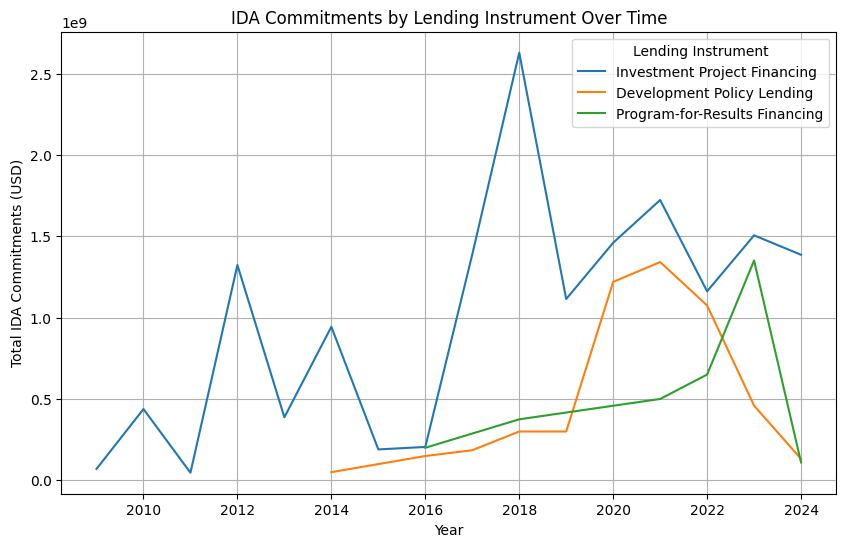

In [164]:

# Step 6: Create the Graph
plt.figure(figsize=(10, 6))
for instrument in lending_instrument_usage['Lending Instrument'].unique():
    instrument_data = lending_instrument_usage[lending_instrument_usage['Lending Instrument'] == instrument]
    plt.plot(instrument_data['Year'], instrument_data['Amount (USD)'], label=instrument)

# Customize the plot
plt.title("IDA Commitments by Lending Instrument Over Time")
plt.xlabel("Year")
plt.ylabel("Total IDA Commitments (USD)")
plt.legend(title="Lending Instrument")
plt.grid(True)
plt.show()


>This helps illustrate trends in IDA’s lending approach, highlighting which instruments have been used more frequently or received more funding over the years

#### A table and a choropleth map showing total amount of IDA commitments in ‘evaluation portfolio’ by country.

In [182]:
# Step 1: Filter for IDA commitments within the evaluation portfolio
ida_commitments_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] == "IDA"].copy()



# Step 2: Ensure unique Project IDs per country to avoid double-counting
ida_commitments_unique = ida_commitments_df.drop_duplicates(subset=['Project ID', 'Country'])


# Step 3: Aggregate IDA commitments by country
country_commitments = ida_commitments_unique.groupby('Country')['Amount (USD)'].sum().reset_index()
country_commitments.columns = ['Country', 'Total IDA Commitments (USD)']

country_commitments

,Country,Total IDA Commitments (USD)
0,Africa,3.294000e+07
1,Bangladesh,2.348655e+09
2,Benin,3.250000e+08
3,Bhutan,3.800000e+07
4,Bolivia,5.000000e+07
5,Burkina Faso,2.550000e+08
6,Cabo Verde,3.500000e+06
7,Cameroon,7.083000e+08
8,Central Asia,2.330000e+07
9,Comoros,4.000000e+07


In [185]:
# Step 5: Plot the Choropleth Map with Plotly
fig = px.choropleth(
    country_commitments,
    locations="Country",
    locationmode="country names",
    color="Total IDA Commitments (USD)",
    hover_name="Country",
    color_continuous_scale="Blues",
    title="Total IDA Commitments by Country in the  Evaluation Portfolio",
)

# Customize layout
fig.update_layout(
    geo=dict(
        showframe=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="IDA Commitments (USD)"
    )
)

# Show the interactive map
fig.show()

> This table and map display the total amount of IDA commitments across countries in the evaluation portfolio

 #### A table showing the top 5 sectors based on volume of total amount of IDA commitments in the ‘evaluation portfolio’, excluding the sectors directly related to renewable energy which were used to identify projects. Hint: the sector percentages indicate the proportion of a project’s commitments going towards various sectors.

In [192]:
# Step 1: Filter for IDA commitments within the evaluation portfolio
ida_commitments_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] == "IDA"].copy()

# Step 2: Exclude sectors directly related to renewable energy
ida_commitments_df = ida_commitments_df[~ida_commitments_df['Sector'].str.lower().str.startswith("renewable energy")]

# Step 3: Extract the year from 'Board Approval Date' to ensure we can group by year
ida_commitments_df['Year'] = ida_commitments_df['Board Approval Date'].dt.year

# Step 4: Ensure unique Project IDs per year and sector to avoid double-counting
ida_commitments_unique = ida_commitments_df.drop_duplicates(subset=['Project ID', 'Year', 'Sector']).copy()

# Step 5: Calculate prorated commitments based on 'Sector Percent'
ida_commitments_unique['Prorated IDA Commitment'] = (
    ida_commitments_unique['Amount (USD)'] * (ida_commitments_unique['Sector Percent'] / 100)
)

# Step 6: Aggregate IDA commitments by sector
sector_commitments = ida_commitments_unique.groupby('Sector')['Prorated IDA Commitment'].sum().reset_index()
sector_commitments.columns = ['Sector', 'Total Prorated IDA Commitments (USD)']

# Step 7: Sort sectors by total commitments and select the top 5
top_5_sectors = sector_commitments.sort_values(by='Total Prorated IDA Commitments (USD)', ascending=False).head(5)

# Display the final table
print("Top 5 Sectors Based on Volume of Total IDA Commitments (Excluding Renewable Energy Sectors):")
top_5_sectors


Top 5 Sectors Based on Volume of Total IDA Commitments (Excluding Renewable Energy Sectors):


,Sector,Total Prorated IDA Commitments (USD)
7,Energy Transmission and Distribution,9.255527e+09
21,Other Energy and Extractives,1.491525e+09
29,Public Administration - Energy and Extractives,1.114135e+09
5,Central Government (Central Agencies),9.129580e+08
24,Other Public Administration,6.476766e+08


> This table presents the top 5 sectors in the evaluation portfolio by prorated IDA commitments, excluding renewable energy-related sectors. The prorated amounts show the share of each project’s IDA funding directed toward these sectors, providing insight into key areas of focus.

In [193]:
# Step 1: Filter out the theme code 'access to energy' (case-insensitive)
filtered_themes_df = evaluation_portfolio_df[
    evaluation_portfolio_df['Theme Level 3'].str.lower() != "access to energy"
].copy()

# Step 2: Ensure unique Project IDs per theme code to avoid double-counting
filtered_themes_unique = filtered_themes_df.drop_duplicates(subset=['Project ID', 'Theme Level 3'])

# Step 3: Calculate the average theme percentage for each Level 3 theme
average_theme_percentages = (
    filtered_themes_unique.groupby('Theme Level 3')['Theme Percentage 3']
    .mean()
    .reset_index()
)

# Step 4: Rename the columns for clarity
average_theme_percentages.columns = ['Theme Level 3', 'Average Theme Percentage']

# Step 5: Sort themes by average percentage and select the top 5
top_5_themes = average_theme_percentages.sort_values(by='Average Theme Percentage', ascending=False).head(5)

# Display the final table
print("Top 5 Level 3 Theme Codes Based on Average Theme Percentage (Excluding 'Access to Energy'):")
top_5_themes


Top 5 Level 3 Theme Codes Based on Average Theme Percentage (Excluding 'Access to Energy'):


,Theme Level 3,Average Theme Percentage
95,Student Assessment,70.000000
74,Private Sector Delivery of Education,70.000000
70,Pandemic Response,68.040000
108,Watershed Management,65.000000
63,Mitigation,62.031884


> This table shows the top 5 Level 3 theme codes in the evaluation portfolio based on average theme percentage, excluding 'access to energy.' 

#### A table showing the top 5 co-financiers in the ‘evaluation portfolio’ based on their commitments, excluding IDA.

In [194]:
# Step 1: Filter out IDA from the evaluation portfolio
co_financiers_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] != "IDA"].copy()

# Step 2: Ensure unique Project IDs per co-financier to avoid double-counting
co_financiers_unique = co_financiers_df.drop_duplicates(subset=['Project ID', 'Financer ID'])

# Step 3: Calculate total commitments for each co-financier
co_financier_commitments = (
    co_financiers_unique.groupby('Financer ID')['Amount (USD)']
    .sum()
    .reset_index()
)

# Step 4: Rename the columns for clarity
co_financier_commitments.columns = ['Financer ID', 'Total Commitments (USD)']

# Step 5: Sort by total commitments and select the top 5 co-financiers
top_5_co_financiers = co_financier_commitments.sort_values(by='Total Commitments (USD)', ascending=False).head(5)

# Display the final table
print("Top 5 Co-Financiers Based on Total Commitments (Excluding IDA):")
top_5_co_financiers


Top 5 Co-Financiers Based on Total Commitments (Excluding IDA):


,Financer ID,Total Commitments (USD)
71,IBRD,5.293916e+10
15,BORR,2.060258e+10
75,IDAT,9.969593e+09
127,ZMUL,3.343800e+09
45,EUIB,3.155476e+09


> This table shows the top 5 co-financiers within the evaluation portfolio based on their total commitments, excluding IDA. It highlights the major contributors and the volume of their financial commitments to the portfolio

In [196]:
# Step 1: Filter for IDA commitments within the evaluation portfolio
ida_commitments_df = evaluation_portfolio_df[evaluation_portfolio_df['Financer ID'] == "IDA"].copy()

# Step 2: Ensure unique Project IDs for each geolocation to avoid double-counting
ida_commitments_unique = ida_commitments_df.drop_duplicates(subset=['Project ID', 'GEO Latitude Number', 'GEO Longitude Number'])

# Step 3: Duplicate project commitment for each unique geolocation
# Each unique geolocation will receive the full project commitment
geolocation_commitments = ida_commitments_unique[['Project ID', 'Amount (USD)', 'GEO Latitude Number', 'GEO Longitude Number']].copy()

# Step 4: Drop any rows with missing geolocation data
geolocation_commitments = geolocation_commitments.dropna(subset=['GEO Latitude Number', 'GEO Longitude Number'])

# Step 5: Prepare data for the heat map
geolocation_commitments['Latitude'] = geolocation_commitments['GEO Latitude Number']
geolocation_commitments['Longitude'] = geolocation_commitments['GEO Longitude Number']
geolocation_commitments['Commitment'] = geolocation_commitments['Amount (USD)']

geolocation_commitments

,Project ID,Amount (USD),GEO Latitude Number,GEO Longitude Number,Latitude,Longitude,Commitment
1018472,P075941,169950000.0,-2.36730,30.762569,-2.36730,30.762569,169950000.0
1018477,P075941,169950000.0,-2.38500,30.785830,-2.38500,30.785830,169950000.0
2539148,P099626,19300000.0,-15.80901,35.060181,-15.80901,35.060181,19300000.0
2539150,P099626,19300000.0,-15.45051,34.700340,-15.45051,34.700340,19300000.0
2539152,P099626,19300000.0,-14.97928,34.955750,-14.97928,34.955750,19300000.0
...,...,...,...,...,...,...,...
7360662,P180748,6900000.0,39.83333,71.000000,39.83333,71.000000,6900000.0
7360663,P180748,6900000.0,40.52828,72.798500,40.52828,72.798500,6900000.0
7360664,P180748,6900000.0,41.42866,75.991110,41.42866,75.991110,6900000.0
7360665,P180748,6900000.0,42.00000,78.000000,42.00000,78.000000,6900000.0


In [233]:
# Calculate the map center based on the data's mean latitude and longitude
center_lat = geolocation_commitments['Latitude'].mean()
center_lon = geolocation_commitments['Longitude'].mean()

# Step 6: Plot the heat map using Plotly with adjusted center and zoom
fig = px.density_mapbox(
    geolocation_commitments,
    lat='Latitude',
    lon='Longitude',
    z='Commitment',
    range_color=(0, 3e9),  # Set the range for the color scale for the bar goes up to 3 billion
    radius=15,
    center=dict(lat=center_lat, lon=center_lon),  # Center based on data
    zoom=1,  # Adjusted zoom level for a closer view
    mapbox_style="open-street-map",
    title="IDA Commitments by Project Geolocations",
    height=900
)

# Display the heat map
fig.show()

In [214]:
import folium
from folium.plugins import HeatMap

In [234]:
# Create a base map centered at the mean latitude and longitude
base_map = folium.Map(location=[center_lat, center_lon], control_scale=True, zoom_start=2)

# Create a HeatMap layer
heat_map = HeatMap(
    data=geolocation_commitments[['Latitude', 'Longitude', 'Commitment']],
    radius=12,
    max_zoom=10,
    # min_opacity=0.5,
    # max_opacity=0.9
)

# Add the HeatMap layer to the base map
heat_map.add_to(base_map)

# Display the map
base_map

NOTE: Did both and left for you to chose between the maps. Follium seems to show more heat around the Australia region, Plotly does not show that. 🤔